# Western vs. Non-western Country Representation in Episode Descriptions

In [748]:
#import necessary libraries and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

## Loading the Data 

In [755]:
#Assign Excel file with cleaned and prepped data
filename = '/Users/jeanettepyne/Desktop/Illinois_reboot_python_2.0/Data/country_data_split.xlsx'

In [756]:
# putting data into a dataframe. 
df = pd.read_excel(filename, index_col = False)

In [751]:
df.head()

,Unnamed: 0,Title,Description_clean,Year,Month,Duration_min,Type,title_gpe_mentioned,description_gpe_mentioned,Single_Multiple,Country,Region,Global South_North,Classification
0,0,"Women’s March on Pretoria, 1956",This 1956 march was a protest against pass law...,2022,3,34,Regular,"[['Pretoria', 'GPE']]","[['South Africa’s', 'GPE'], ['South Africa', '...",Single,South Africa,Eastern and Southern Africa,Global South,Non-western
1,1,"Thomas Hardy, Emma Gifford and Florence Dugdale","Once you know about Hardy’s life, it's natural...",2022,3,39,Regular,[],"[['Angelique', 'GPE']]",NaN,NaN,NaN,NaN,NaN
2,2,SYMHC Classics: 6888th Central Postal Director...,This 2019 episode covers the 6888th Central Po...,2022,3,34,SYMHC Classics:,[],"[['U.S.', 'GPE']]",Single,United States,North America,Global North,Western
3,3,Behind the Scenes Minis: Maria and Bruno,Tracy shares how she learned about Maria Gertr...,2022,3,19,Behind the Scenes Minis:,[],[],NaN,NaN,NaN,NaN,NaN
4,4,Giordano Bruno,"Bruno was a mathematician, philosopher, astron...",2022,3,40,Regular,[],"[['Italy', 'GPE'], ['Martinez', 'GPE']]",Single,Italy,Western Europe,Global North,Western


In [754]:
# Identifying the columns neededfor analysis. 
field = ['Title', 'Description_clean', 'Type', 'Year', 'Month', 'Duration_min', 'Single_Multiple', 'Country','Region', 'Classification']

# Creating a new dataframe with specified columns. 
df_country = pd.DataFrame(df, columns = field)

#Extracting random sample. 
df_country.sample(n=10)

,Title,Description_clean,Type,Year,Month,Duration_min,Single_Multiple,Country,Region,Classification
922,William Moulton Marston & the Creation of Wond...,Most people know Wonder Woman as an embodiment...,Regular,2017,6,44,NaN,NaN,NaN,NaN
1555,Tamerlane and the Battle of Ankara,Timur the Lame (that's Tamerlane to the Wester...,Regular,2011,8,22,Single,Turkey,Eastern Europe and Central Asia,Non-western
1405,5 War Dogs of History,Dogs have been used in war for a long time and...,Regular,2013,1,27,Single,Vietnam,East Asia and Pacific,Non-western
290,SYMHC Classics: Coubertin and the Modern Olymp...,This episode is our 2016 live show from the Da...,SYMHC Classics:,2020,11,51,NaN,NaN,NaN,NaN
1058,Knitting's Early History,Because of its functionality in providing need...,Regular,2016,3,36,NaN,NaN,NaN,NaN
546,The Greenbrier Ghost,The story of Zona Heaster Shue's death and sub...,Regular,2019,10,29,Single,United States,North America,Western
426,Host Faves: Annette Kellerman,This 2017 episode covers the Australian Keller...,Regular,2020,4,31,NaN,NaN,NaN,NaN
33,SYMHC Classics: Shirley Chisholm,"This 2018 episode Shirley Chisolm, who was pol...",SYMHC Classics:,2022,2,33,Single,United States,North America,Western
135,Berthe Morisot,"Morisot primarily worked in oils, watercolors ...",Regular,2021,8,44,NaN,NaN,NaN,NaN
512,Ethiopia's Rock-hewn Churches of Lalibela,The complex at Lalibela was excavated from vol...,Regular,2019,12,36,Single,Ethiopia,Eastern and Southern Africa,Non-western


In [710]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              1899 non-null   object
 1   Description_clean  1898 non-null   object
 2   Type               1899 non-null   object
 3   Year               1899 non-null   int64 
 4   Month              1899 non-null   int64 
 5   Duration_min       1899 non-null   int64 
 6   Single_Multiple    756 non-null    object
 7   Country            758 non-null    object
 8   Region             758 non-null    object
 9   Classification     758 non-null    object
dtypes: int64(3), object(7)
memory usage: 148.5+ KB


In [711]:
df.shape

(1899, 14)

In [757]:
#Create a new dataframe from df_country that selects only the episodes that are regular. 
country_regular = df_country[df_country['Type']=='Regular']

In [713]:
country_regular.sample(n=5)

,Title,Description_clean,Type,Year,Month,Duration_min,Single_Multiple,Country,Region,Classification
1466,"John James Audubon: American Woodsman, Part 2","After John James Audubon finished his book, he...",Regular,2012,6,28,Multiple,United States,North America,Western
1101,"Gilles Garnier, the Werewolf of Dole",Sixteenth-century France had a serious case of...,Regular,2015,10,25,Single,France,Western Europe,Western
1833,How the Vikings Worked,In most films Vikings are depicted as bloodthi...,Regular,2009,1,14,NaN,NaN,NaN,NaN
1281,"Elizabeth Blackwell, America's First Female M.D.",It's not a story of a person with a childhood ...,Regular,2014,3,31,Single,United States,North America,Western
1257,Ruth Harkness and the First Panda in the U.S.,In the 1930s a New York socialite had a dream....,Regular,2014,6,38,Single,United States,North America,Western


In [714]:
country_regular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1898
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              1467 non-null   object
 1   Description_clean  1467 non-null   object
 2   Type               1467 non-null   object
 3   Year               1467 non-null   int64 
 4   Month              1467 non-null   int64 
 5   Duration_min       1467 non-null   int64 
 6   Single_Multiple    640 non-null    object
 7   Country            642 non-null    object
 8   Region             642 non-null    object
 9   Classification     642 non-null    object
dtypes: int64(3), object(7)
memory usage: 126.1+ KB


In [715]:
country_regular['Country'].unique()

array(['South Africa', nan, 'Italy', 'Mexico', 'United States', 'France',
       'Russian Federation', 'Ukraine', 'United Kingdom', 'Turkey',
       'Canada', 'Nigeria', 'Germany', 'Denmark', 'Greece', 'Spain',
       'Australia', 'Egypt', 'Spain ', 'Peru', 'Honduras', 'Japan',
       'China', 'India', 'Tanzania', 'Ethiopia', 'Netherlands', 'France ',
       'Guatemala', 'Ireland', 'Morocco', 'Venezuela',
       'Dominican Republic', 'Pakistan', 'South Sudan', 'Albania',
       'New Zealand', 'Germany ', 'Jamaica', 'Portugal', 'Israel',
       'United States ', 'Norway', 'Iceland', 'Australia ', 'Bahamas',
       'Benin', 'Zimbabwe', 'Saint Kitts and Nevis', 'Sweden',
       'Indonesia', 'Austria', 'Ghana', 'Iraq ', 'Republic of Korea',
       'Kenya', 'Syrian Arab Republic', 'Japan ', 'Vietnam', 'Bulgaria',
       'Iraq', 'Iran', 'Chile', 'Belgium', 'Angola ', 'Tunisia',
       'Malaysia', 'Panama', 'Mali', 'Saudi Arabia', 'Hungary',
       'Trinidad and Tobago', 'Cambodia', 'Czech Re

In [716]:
country_regular['Classification'].value_counts()

Western        502
Non-western    140
Name: Classification, dtype: int64

In [717]:
country_regular['Region'].value_counts()
#Need to strip whitespace. How to do this wihtout creating another dataframe? 

North America                       299
Western Europe                      187
East Asia and Pacific                58
Latin America and Caribbean          24
Middle East and North Africa         23
Eastern Europe and Central Asia      16
Eastern and Southern Africa          13
South Asia                           11
Eastern Europe and Central Asia       6
West and Central Africa               5
Name: Region, dtype: int64

In [718]:
# Clean "Western" and "Non-western" classification 
str_classification = country_regular['Classification'].astype("string").dropna()

In [758]:
# More cleaning. 
str_classification = str_classification.str.strip()

In [759]:
#Creating a new data frame from new series. 
df_classification = pd.DataFrame(str_classification) 

## Western vs. Non-western Representation 
1. I classified Western nations as English-speaking and European nations. I excluded Eastearn Europe and Latin America and the Caribbean from the Western definition. 
2. Only Western Europe, North America, Australia, and New Zealand were considered "Western" because there is no debate over this. 
3. All other regions were considered "Non-western". 
4. Here are the websites I used for the handcoding process in Excel: 
    1. https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification
    2. https://data.unicef.org/regionalclassifications/


# Bar Chart to show number of Western vs. Non-western episodes/mentions. 

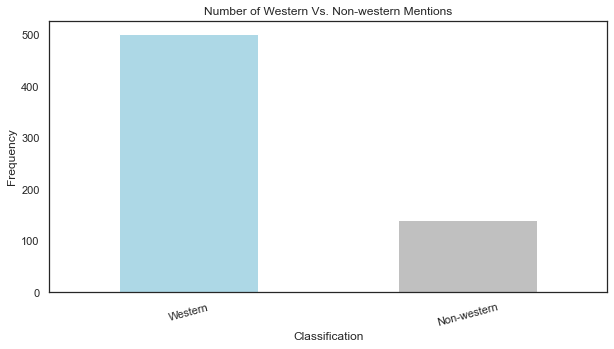

In [721]:

f,ax=plt.subplots(figsize=(10,5))
data_class = df_classification['Classification'].value_counts()
ax.set_xlabel('Classification')
ax.set_ylabel('Frequency')
data_class.plot.bar(rot = 15, x = "Classification", y = "Frequency", color =['lightblue', 'silver'],title = "Number of Western Vs. Non-western Mentions")
plt.show()

# Pie Chart to show difference in percentage of Western vs. Non-western mentions. 
1. Western far exceeds Non-western 

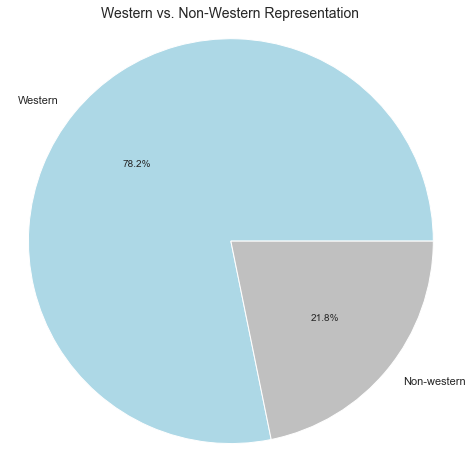

In [745]:
class_labels = 'Western', 'Non-western'
class_colors = ['lightblue', 'silver']
plt.figure(figsize=(8,8))
plt.pie(data_class, labels = class_labels, autopct='%1.1f%%', colors=class_colors, radius=5) #this is auto percentage. 
plt.title('Western vs. Non-Western Representation', fontsize = 14)
plt.axis('equal')
plt.show()


# Bar chart of regional representation. 

In [663]:
str_region = country_regular['Region'].astype("string").dropna()

In [664]:
str_region = str_region.str.strip()

In [665]:
str_region.value_counts()

North America                      299
Western Europe                     187
East Asia and Pacific               58
Latin America and Caribbean         24
Middle East and North Africa        23
Eastern Europe and Central Asia     22
Eastern and Southern Africa         13
South Asia                          11
West and Central Africa              5
Name: Region, dtype: Int64

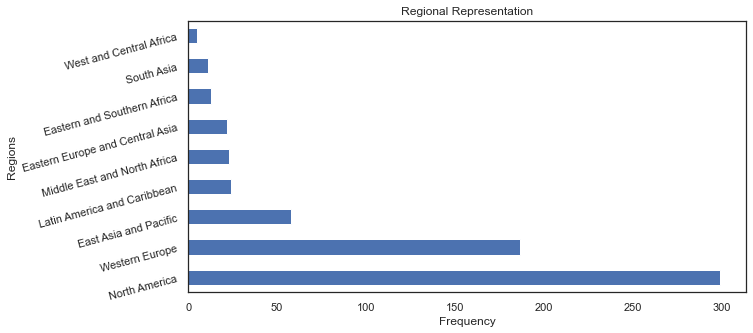

In [666]:
f,ax=plt.subplots(figsize=(10,5))
data_region = str_region.value_counts()
ax.set_ylabel('Regions')
ax.set_xlabel('Frequency')
data_region.plot.barh(rot = 15, y = "Regions", x = "Frequency", title = "Regional Representation")

plt.show()


In [667]:
country_regular.sample(n=5)

,Title,Description_clean,Type,Year,Month,Duration_min,Single_Multiple,Country,Region,Classification
1523,Rosalind Franklin: DNA's Dark Lady,The men who are usually credited with discerni...,Regular,2011,12,27,NaN,NaN,NaN,NaN
1809,Were ancient Egyptians the first feminists?,"When Herodotus explored Egypt, he was startled...",Regular,2009,4,15,Single,Egypt,Middle East and North Africa,Non-western
1406,Ned Kelly's Last Stand,"Ned Kelly's cropped up in the news again, but ...",Regular,2013,1,20,NaN,NaN,NaN,NaN
563,Sor Juana Inés de la Cruz,She was the Spanish empire’s most widely publi...,Regular,2019,9,40,NaN,NaN,NaN,NaN
573,Sarah Josepha Hale & Godey’s Lady’s Book,Godey’s Lady’s Book was the most popular magaz...,Regular,2019,8,36,Single,United States,North America,Western


# Box plot and T-test for Difference in duration for Western vs. Non-western episodes. 

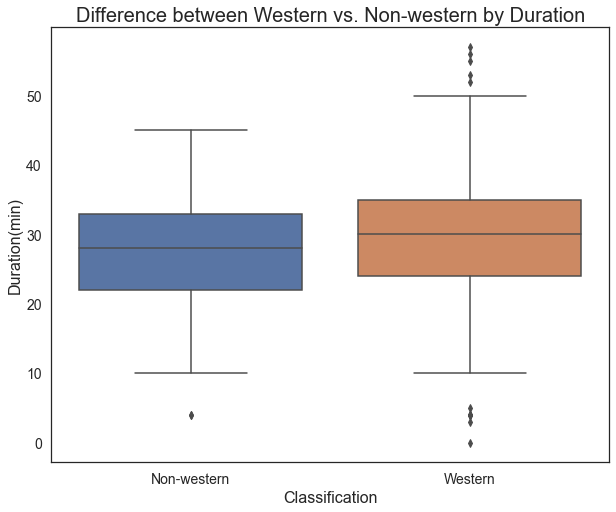

In [760]:
#Box plot---Duration for Western vs. Non-Western 

plt.figure(figsize=(10,8))
# sns.boxplot(x = wn_class, y = duration, data = country_regular, palette = 'rainbow')
sns.boxplot(y=country_regular['Duration_min'], x=country_regular['Classification'])
plt.title("Difference between Western vs. Non-western by Duration", fontsize=20)
plt.xlabel('Classification', fontsize=16)
plt.ylabel('Duration(min)', fontsize=16)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.show()

#t-test https://stackoverflow.com/questions/13404468/t-test-in-pandas

In [761]:
#Import library for statistics. 
import scipy

In [670]:
ttest_data = country_regular[['Classification', 'Duration_min']].copy()

In [671]:
ttest_data.head()

,Classification,Duration_min
0,Non-western,34
1,NaN,39
4,Western,40
5,Non-western,40
6,Western,40


In [672]:
w_data = ttest_data[ttest_data['Classification']=='Western'].dropna()
#western cells extracted

In [673]:
nw_data = ttest_data[ttest_data['Classification']=='Non-western'].dropna()
#non_western cells extracted 

In [674]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 4 to 1895
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classification  502 non-null    object
 1   Duration_min    502 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [675]:
nw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 1898
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classification  140 non-null    object
 1   Duration_min    140 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [676]:
scipy.stats.ttest_ind(w_data['Duration_min'], nw_data['Duration_min'])

# suggests that there is a significant difference. 

Ttest_indResult(statistic=2.7984985073952746, pvalue=0.005288656691106502)

# Further Areas to Study 
1. What's the median, standard deviation? 
2. What may be other confounding factors(length of ads, listener mail,)?
3. Is the porportion of Western vs. Non-western episodes steady over the years? 
4. Perhaps try making a stacked bar chart or porportional line chart 

## Stacked Bar Chart --Western vs Non-Western over time 

In [677]:
# make bar chart number of episodes each year  
#then add a group notation of counts 

In [678]:
country_regular['Year'].value_counts()

2020    119
2015    113
2010    110
2014    108
2013    107
2012    107
2011    106
2017    105
2016    105
2019    101
2018    101
2021     99
2009     99
2008     59
2022     28
Name: Year, dtype: int64

In [679]:
df_stacked = country_regular[['Year','Classification']].copy()

In [680]:
df_stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1898
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1467 non-null   int64 
 1   Classification  642 non-null    object
dtypes: int64(1), object(1)
memory usage: 74.4+ KB


In [681]:
df_stacked['Year'] = pd.to_datetime(df_stacked['Year'], format = '%Y')

In [682]:
df_stacked['Year'].value_counts()

2020-01-01    119
2015-01-01    113
2010-01-01    110
2014-01-01    108
2012-01-01    107
2013-01-01    107
2011-01-01    106
2017-01-01    105
2016-01-01    105
2018-01-01    101
2019-01-01    101
2021-01-01     99
2009-01-01     99
2008-01-01     59
2022-01-01     28
Name: Year, dtype: int64

In [683]:
df_stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1898
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            1467 non-null   datetime64[ns]
 1   Classification  642 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 74.4+ KB


In [684]:
df_stacked['Year'] = pd.DatetimeIndex(df_stacked['Year']).year

In [685]:
df_stacked['Year'] 

0       2022
1       2022
4       2022
5       2022
6       2022
        ... 
1894    2008
1895    2008
1896    2008
1897    2008
1898    2008
Name: Year, Length: 1467, dtype: int64

In [686]:
df_stacked

,Year,Classification
0,2022,Non-western
1,2022,NaN
4,2022,Western
5,2022,Non-western
6,2022,Western
...,...,...
1894,2008,NaN
1895,2008,Western
1896,2008,NaN
1897,2008,NaN


Year  Classification
2014  Western           47
2016  Western           45
2017  Western           43
2018  Western           42
2021  Western           36
2019  Western           36
2010  Western           35
2015  Western           35
2011  Western           35
2020  Western           31
2012  Western           30
2013  Western           30
2009  Western           29
2008  Western           17
2010  Non-western       16
2014  Non-western       14
2013  Non-western       13
2011  Non-western       11
2022  Western           11
2015  Non-western       11
2020  Non-western       11
2008  Non-western       10
2012  Non-western        9
2019  Non-western        8
2009  Non-western        8
2016  Non-western        7
2018  Non-western        7
2022  Non-western        6
2017  Non-western        5
2021  Non-western        4
dtype: int64

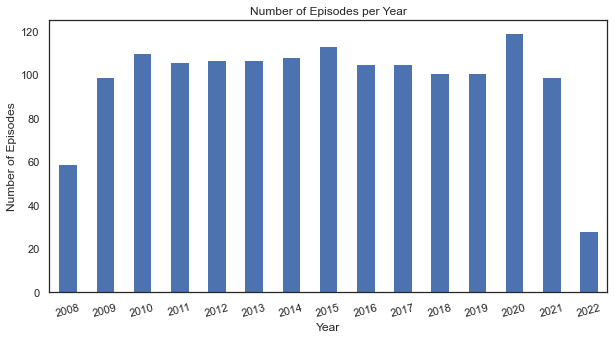

In [687]:
# labels = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
#w_num = [df_stacked['Classification']=='Western']
#nw_num =[df_stacked['Classification']=='Non-western']
ep_year = df_stacked['Year'].value_counts().sort_index()
width = 0.35

f,ax=plt.subplots(figsize=(10,5))
#ax.bar(ep_year, w_num, width, label='Western')
#ax.bar(ep_year, nw_num, width, bottom=w_num, label='Non-western')
ax.set_ylabel('Number of Episodes')
ax.set_xlabel('Year')
ep_year.plot.bar(rot = 15, y = "Number of Episodes", x = "Year", title = "Number of Episodes per Year")

plt.show()

In [688]:
df_w_data = df_stacked[df_stacked['Classification']=='Western']

In [689]:
df_w_data['Year'].value_counts()
#number of western ep per year 

2014    47
2016    45
2017    43
2018    42
2021    36
2019    36
2015    35
2011    35
2010    35
2020    31
2013    30
2012    30
2009    29
2008    17
2022    11
Name: Year, dtype: int64

In [690]:
df_nw_data['Year'].value_counts()

2010    17
2014    14
2013    13
2020    11
2015    11
2011    11
2008    10
2012     9
2019     8
2009     8
2018     7
2016     7
2022     6
2017     5
2021     4
Name: Year, dtype: int64

In [691]:
df_stacked['Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008])

In [692]:
years = df_stacked['Year'].unique()
x_axis = np.arange(len(years))

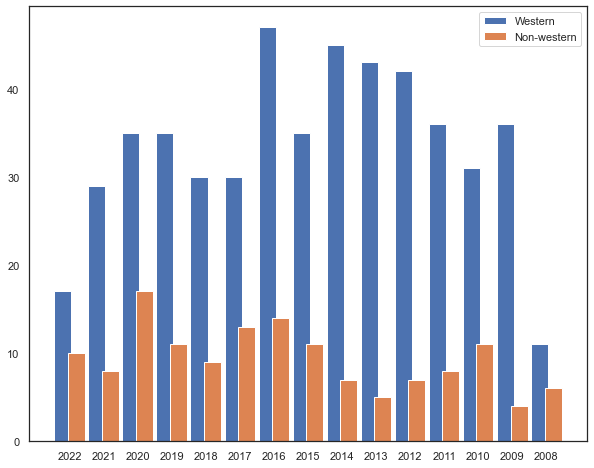

In [693]:
#how to get the graph into ascending order by year? 
f,ax=plt.subplots(figsize=(10,8))
plt.bar(x_axis -0.2, df_w_data['Year'].value_counts().sort_index(), width=0.5, label = 'Western')
plt.bar(x_axis +0.2, df_nw_data['Year'].value_counts().sort_index(), width=0.5, label = 'Non-western')

#title x and y axis 

plt.xticks(x_axis, years)

plt.legend()

plt.show()

In [694]:
'''
fig, ax = plt.subplots()

# First plot the 'Male' bars for every day.
ax.bar(df_w_data.index, [df_w_data['Classification']=='Western'], label='Western')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(df_nw_data.index, [df_nw_data['Classifiation']=='Non-western'], bottom=[df_w_data['Classification']=='Western'],
       label='Non-western')
ax.set_title('Western vs. Non-western episodes over time')
ax.legend()
'''

"\nfig, ax = plt.subplots()\n\n# First plot the 'Male' bars for every day.\nax.bar(df_w_data.index, [df_w_data['Classification']=='Western'], label='Western')\n# Then plot the 'Female' bars on top, starting at the top of the 'Male'\n# bars.\nax.bar(df_nw_data.index, [df_nw_data['Classifiation']=='Non-western'], bottom=[df_w_data['Classification']=='Western'],\n       label='Non-western')\nax.set_title('Western vs. Non-western episodes over time')\nax.legend()\n"

In [ ]:
# Percent bar graph over time 
# scatterplot with a trend line 
# Non-western /total 
    #df_nw_data['Year'].value_counts()/country_regular['Year'].value_counts() 
    
    #trend line analysis 



## Network Graph Material

In [695]:
country_multiple = country_regular[country_regular['Single_Multiple']=='Multiple'] 

In [696]:
country_multiple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 5 to 1888
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              105 non-null    object
 1   Description_clean  105 non-null    object
 2   Type               105 non-null    object
 3   Year               105 non-null    int64 
 4   Month              105 non-null    int64 
 5   Duration_min       105 non-null    int64 
 6   Single_Multiple    105 non-null    object
 7   Country            105 non-null    object
 8   Region             105 non-null    object
 9   Classification     105 non-null    object
dtypes: int64(3), object(7)
memory usage: 9.0+ KB


In [697]:
country_multiple.sample(n=7)

,Title,Description_clean,Type,Year,Month,Duration_min,Single_Multiple,Country,Region,Classification
1120,The Franco-Mexican Pastry War,When a French pastry chef complained to King L...,Regular,2015,8,25,Multiple,Mexico,Latin America and Caribbean,Non-western
951,"Lady Jane Grey, the Nine-day Queen",For a very short time between Edward VI and Ma...,Regular,2017,3,33,Multiple,United Kingdom,Western Europe,Western
1048,A History of Pizza Live at C2E2,"Pizza-like foods go way, way back in history, ...",Regular,2016,4,50,Multiple,Italy,Western Europe,Western
1679,What really happened on Bloody Sunday?,In 1972 the tension between the United Kingdom...,Regular,2010,7,16,Multiple,United Kingdom,Western Europe,Western
14,Holodomor,“Holodomor” is a name that was coined in the 1...,Regular,2022,3,36,Multiple,Ukraine,Eastern Europe and Central Asia,Non-western
1143,Henry Gerber and Chicago's Society for Human R...,"In the 1920s, the Society for Human Rights was...",Regular,2015,6,27,Multiple,United States,North America,Western
1137,Child Migrant Program,"In the 19th and 20th centuries, 150,000 child ...",Regular,2015,7,24,Multiple,New Zealand,East Asia and Pacific,Western


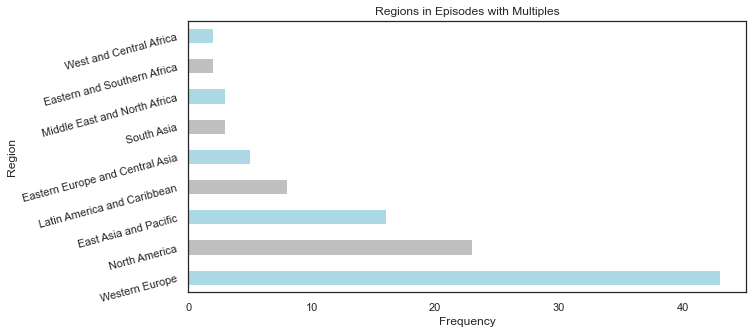

In [698]:
f,ax=plt.subplots(figsize=(10,5))
data_class = country_multiple['Region'].value_counts()
ax.set_xlabel('Frequency')
ax.set_ylabel('Region')
data_class.plot.barh(rot = 15, x = "Frequency", y = "Region", color =['lightblue', 'silver'],title = "Regions in Episodes with Multiples")
plt.show()

#other colors? 

# how to get this to be accurate. I want to know which episodes have BOTH western + non-western vs. Non-western + non-western 

#This could be a networking graph. Go with random 20% sample. 

In [699]:
df_year = df_country[['Title', 'Year', 'Region','Classification']].copy()

TypeError: 'value' must be an instance of str or bytes, not a float

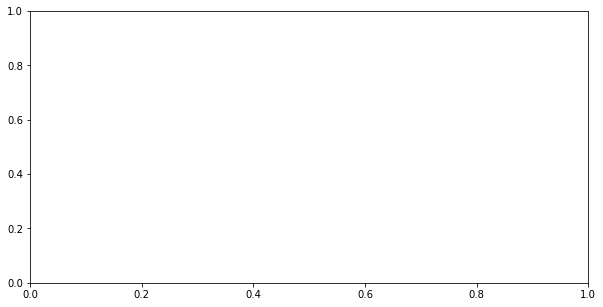